In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import IPython.html.widgets as widg
from IPython.display import clear_output
import sys
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
class Network:
    def __init__(self, shape):
        """The base network class. This defines a simple feed-forward network with appropriate weights and biases.
        
        Arguments:
        shape (list-like): This defines the # of layers and # of neurons per layer in your network.
                           Each element of the array or list adds a new layer with the number neurons specified by the element.
        Variables:
        self.shape: see shape.
        self.weights: A list of numpy arrays containing the weights corresponding to each channel between neurons.
        self.biases: A list of numpy arrays containing the biases corresponding to each neuron.
        self.errors: A list of numpy arrays containing the error of each neurons in any iteration of the training process.
        self.eta: A float representing the learning rate.
        self.lam: A scale factor used in L2 regularization
        """
        
        self.shape = np.array(shape) #shape is array-like, i.e. (2,3,4) is a 2 input, 3 hidden node, 4 output network
        self.weights = [np.random.ranf((self.shape[i],self.shape[i-1]))*.1 for i in range(1,len(self.shape))]
        self.biases = [np.random.ranf((self.shape[i],))*.1 for i in range(1,len(self.shape))]
        self.errors = [np.random.ranf((self.shape[i],)) for i in range(1,len(self.shape))]
        self.eta = .1
        self.lam = .01
        self.wrong = 0
        self.total = 0
    def sigmoid(self, inputs):
        """Computes the sigmoid function of some input.
        
        Arguments:
        inputs (float or numpy array): The input or inputs to be fed through the sigmoid function.
        """
        
        return 1/(1+np.exp(-inputs))
    def feedforward(self, inputs):
        """Feeds inputs through the network and returns the output.
        
        Arguments:
        inputs (numpy array): The inputs to the network, must be the same size as the first(input) layer.
        
        Variables:
        self.activation: A list of numpy arrays corresponding to the output of each neuron in your network.
        """
        
        assert inputs.shape==self.shape[0] #inputs must feed directly into the first layer.
        self.activation = [np.zeros((self.shape[i],)) for i in range(len(self.shape))]
        self.activation[0] = inputs
        for i in range(1,len(self.shape)):
            self.activation[i]=self.sigmoid(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])
        return self.activation[-1]
    def calc_learning_rate(self,grad):
        if grad>.85:
            self.eta=.1/grad**.1*1/(.25*(2*np.pi)**.5)*np.exp(-(grad)**2/(2*(.25)**2))
            self.wrong+=1
        else:
            self.eta=.1/grad**.6*1/(.4*(2*np.pi)**.5)*np.exp(-(grad)**2/(2*(.4)**2))*(grad+.08)
        self.total+=1
    def comp_error(self, answer):
        """Computes the errors of each neuron.(Typically called Back Propagation)
        
        Arguments:
        answers (numpy array): The expected output from the network.
        """
#         if (self.activation[-1]-answer).any>.15:
#             self.eta = .005
#         else: 
#             self.eta = .5
        self.calc_learning_rate(np.amax(np.abs((self.activation[-1]-answer))))
        #print(np.amax(np.abs((self.activation[-1]-answer))))
        assert answer.shape==self.activation[-1].shape
        self.errors[-1] = np.pi*np.tan(np.pi/2*(self.activation[-1]-answer))*1/np.cos(np.pi/2*(self.activation[-1]-answer))**2*np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])/(np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])+1)**2
        for i in range(len(self.shape)-2, 0, -1):
            self.errors[i-1] = self.weights[i].transpose().dot(self.errors[i])*np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])/(np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])+1)**2
    def grad_descent(self):
        """Changes each variable based on the gradient descent algorithm."""
        
        #for i in range(len(self.biases)):
         #   self.biases[i]=self.biases[i]-self.eta*self.errors[i]
        for i in range(len(self.weights)):
            self.biases[i]=self.biases[i]-self.eta*self.errors[i]
            for j in range(self.weights[i].shape[0]):
                for k in range(self.weights[i].shape[1]):
                    self.weights[i][j,k] = (1-self.eta*self.lam/1000)*self.weights[i][j,k] - self.eta*self.activation[i][k]*self.errors[i][j]
    def train(self, inputs, answer):
        """Trains the network.
        
        Arguments:
        inputs (numpy array): The inputs to the network, must be the same size as the first(input) layer.
        answers (numpy array): The expected output from the network, must be the same size as the last(output) layer.
        """
        
        self.feedforward(inputs)
        self.comp_error(answer)
        self.grad_descent()
    def get_fractional_err(self):
        return(self.wrong/(self.total*1.0))

# add piecewise def for learning rate


In [5]:
n1 = Network([2,15,1])
print n1.feedforward(np.array([1,2]))
for i in range(1000):
    n1.train(np.array([1,2]), np.array([.5]))
print n1.feedforward(np.array([1,2]))

[ 0.61827788]
[ 0.5002418]


In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data[0]*.01)

[ 0.    0.    0.05  0.13  0.09  0.01  0.    0.    0.    0.    0.13  0.15
  0.1   0.15  0.05  0.    0.    0.03  0.15  0.02  0.    0.11  0.08  0.    0.
  0.04  0.12  0.    0.    0.08  0.08  0.    0.    0.05  0.08  0.    0.
  0.09  0.08  0.    0.    0.04  0.11  0.    0.01  0.12  0.07  0.    0.
  0.02  0.14  0.05  0.1   0.12  0.    0.    0.    0.    0.06  0.13  0.1   0.
  0.    0.  ]


In [6]:
num = []
for i in range(50,60):
    num.append(Network([64,i,10]))

In [7]:
# %timeit num.feedforward(digits.data[89]*.01)
# %timeit num.comp_error(np.eye(10)[digits.target[89]])
# %timeit num.grad_descent()

In [8]:
def Train_it(num, itera):
    iden = np.eye(10)
    acc = np.zeros((itera,))
    trainer = zip(digits.data,digits.target)
    perm = np.random.permutation(trainer)
    trains = perm[:1000]
    test = perm[1001:]
    #num = Network([64, 14, 10])
    print num.feedforward(digits.data[89]*.01)
    for i in range(itera):
        print(float(100*i/(itera*1.0)))
        for dig, ans in trains:
            num.train(dig*.01,iden[ans])
        cor = 0
        tot = 0
        for dig, ans in test:
            if num.feedforward(dig*.01).argmax()==ans:
                cor += 1
            tot += 1
        acc[i] = cor/float(tot)
    return acc

In [9]:
acc = Train_it(num[8], 20)
print(acc)
print(num[8].get_fractional_err())

[ 0.81743504  0.83068927  0.82938804  0.84996117  0.84918228  0.82243244
  0.82768515  0.85351519  0.83520925  0.80353759]
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.0
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
[ 0.08291457  0.08291457  0.16959799  0.21733668  0.44974874  0.54020101
  0.67964824  0.70477387  0.71984925  0.75        0.7701005   0.78140704
  0.80276382  0.81658291  0.82788945  0.83542714  0.8379397   0.84673367
  0.85678392  0.86557789]
0.0353


In [10]:
accu = np.zeros((20,50))
fracerr = np.zeros((20,))
for i in range(20):
    accu[i] = Train_it(num[i], 50)
    fracerr[i] = num[i].get_fractional_err()
print(accu)
print(fracerr)

[ 0.80159158  0.83990237  0.82860271  0.81109038  0.81741794  0.84243747
  0.78009258  0.82671509  0.80534593  0.79676113]
0.0
2.0
4.0
6.0
8.0
10.0
12.0
14.0
16.0
18.0
20.0
22.0
24.0
26.0
28.0
30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
46.0
48.0
50.0
52.0
54.0
56.0
58.0
60.0
62.0
64.0
66.0
68.0
70.0
72.0
74.0
76.0
78.0
80.0
82.0
84.0
86.0
88.0
90.0
92.0
94.0
96.0
98.0
[ 0.81571568  0.81716887  0.8233506   0.819147    0.81185664  0.81386041
  0.78660685  0.82327153  0.79018756  0.81308636]
0.0
2.0
4.0
6.0
8.0
10.0
12.0
14.0
16.0
18.0
20.0
22.0
24.0
26.0
28.0
30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
46.0
48.0
50.0
52.0
54.0
56.0
58.0
60.0
62.0
64.0
66.0
68.0
70.0
72.0
74.0
76.0
78.0
80.0
82.0
84.0
86.0
88.0
90.0
92.0
94.0
96.0
98.0
[ 0.79864581  0.84036781  0.82233912  0.81493201  0.82546577  0.81309311
  0.78301667  0.80476699  0.81432611  0.82245911]
0.0
2.0
4.0
6.0
8.0
10.0
12.0
14.0
16.0
18.0
20.0
22.0
24.0
26.0
28.0
30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
46.0
48.0
50.0
52.0
54.0
56.0
5

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:32: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:69: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:69: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:71: RuntimeWarning: overflow encountered in exp


IndexError: list index out of range

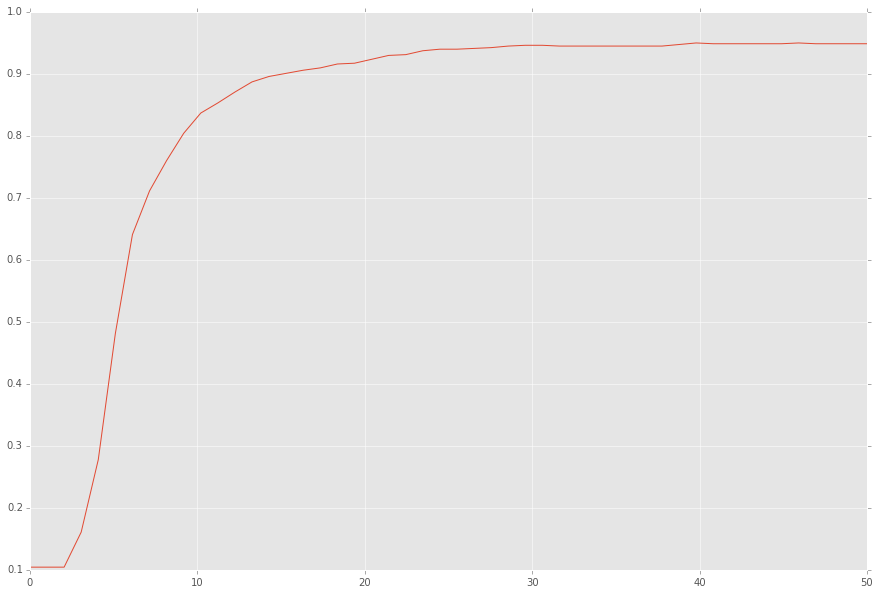

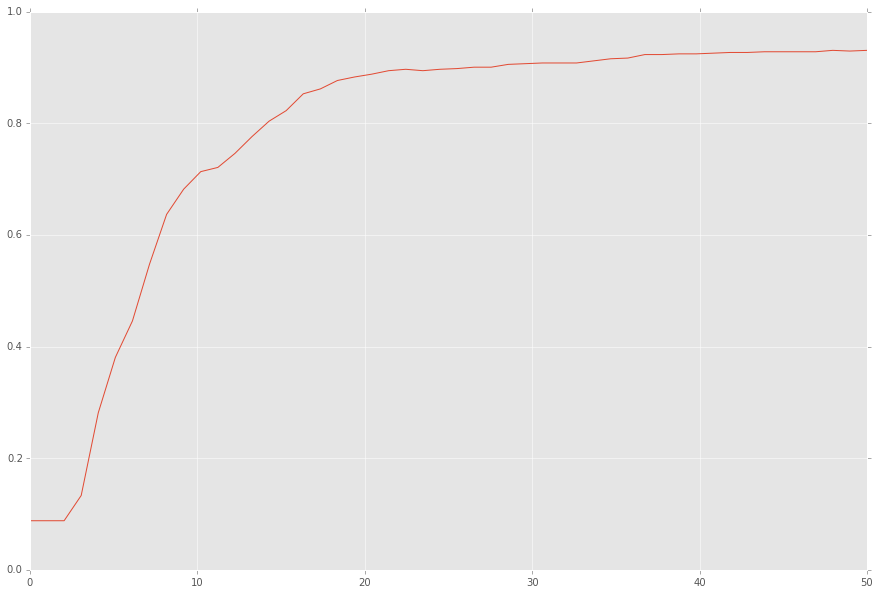

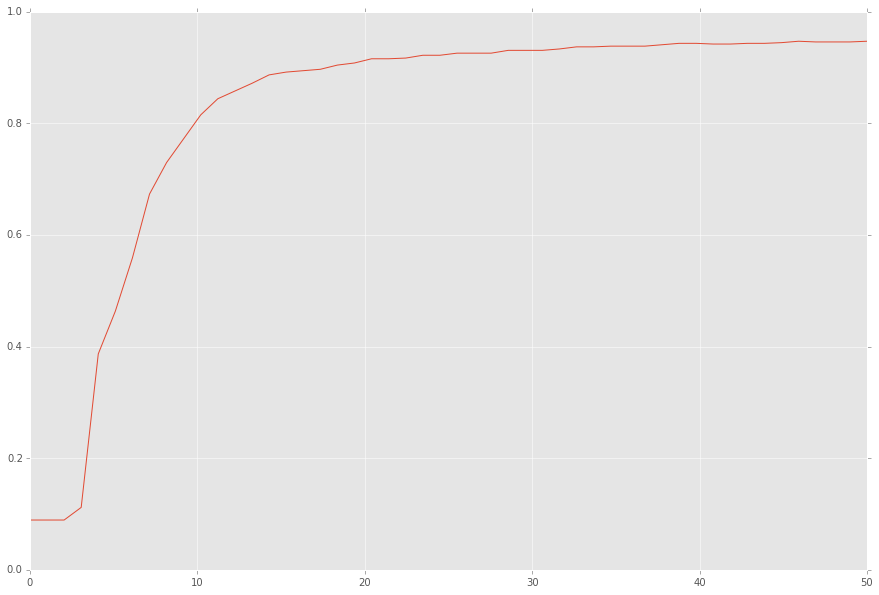

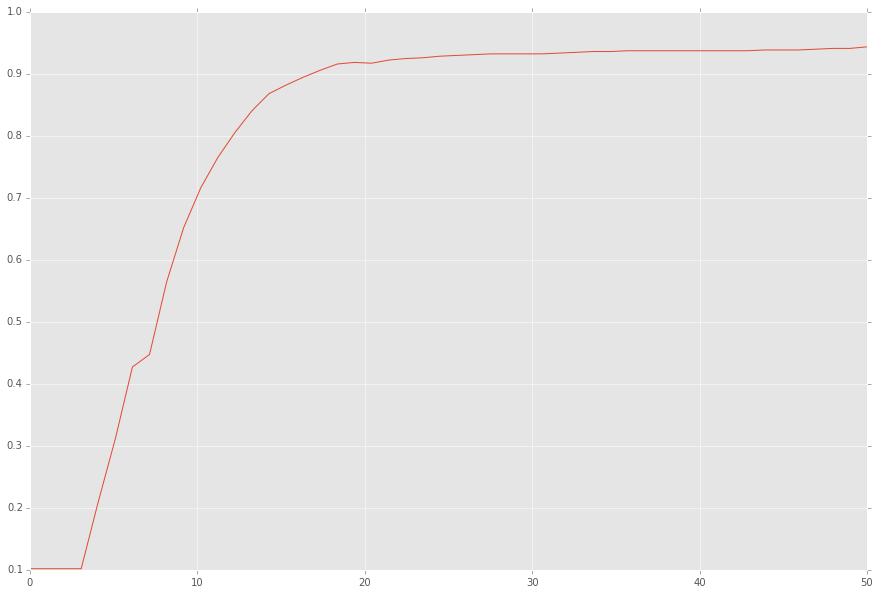

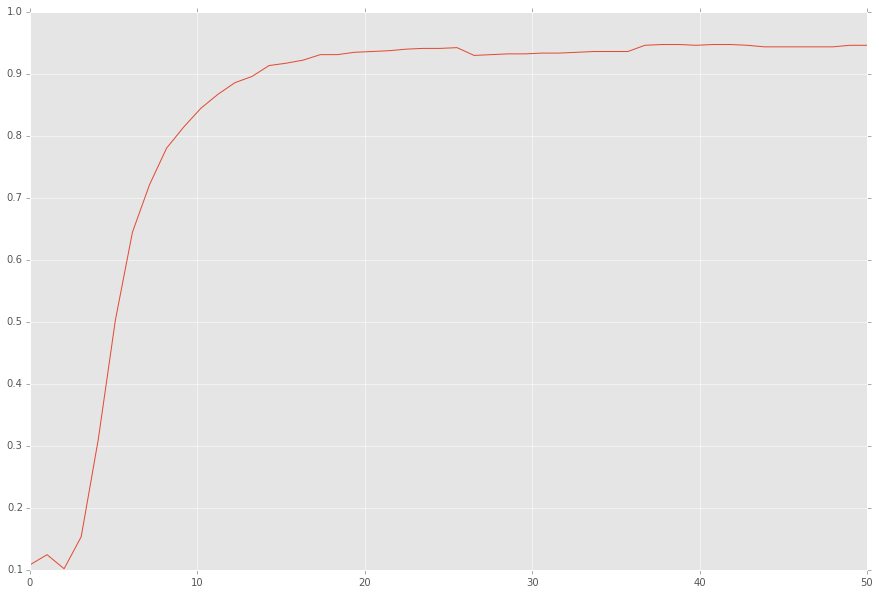

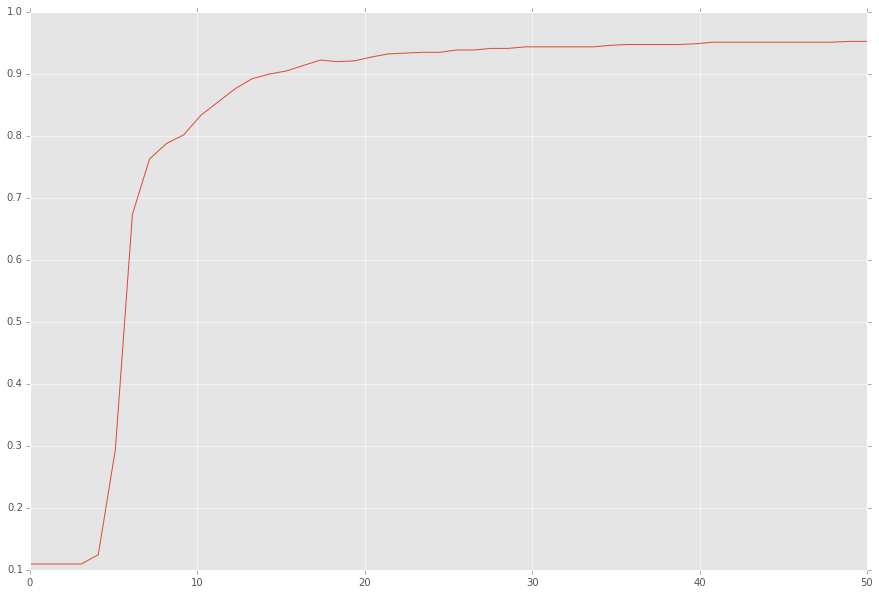

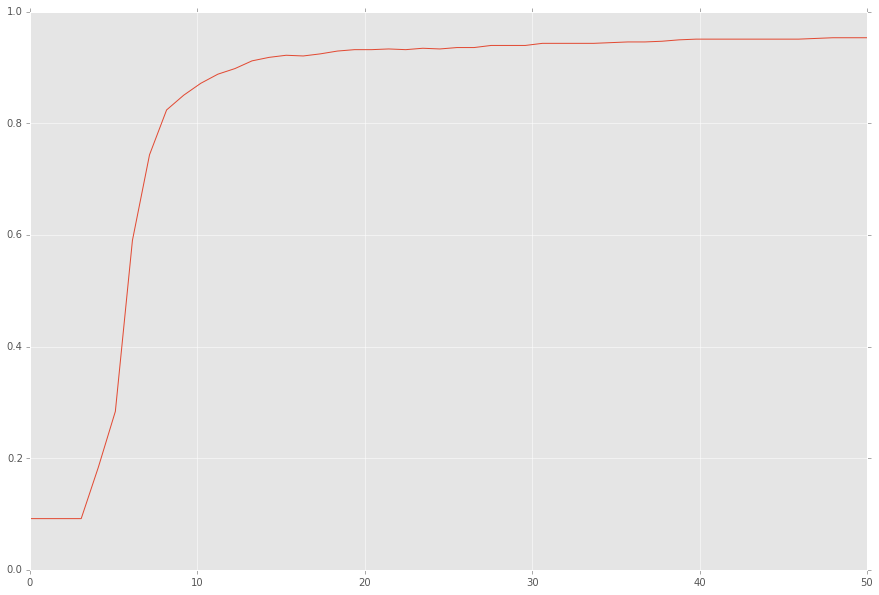

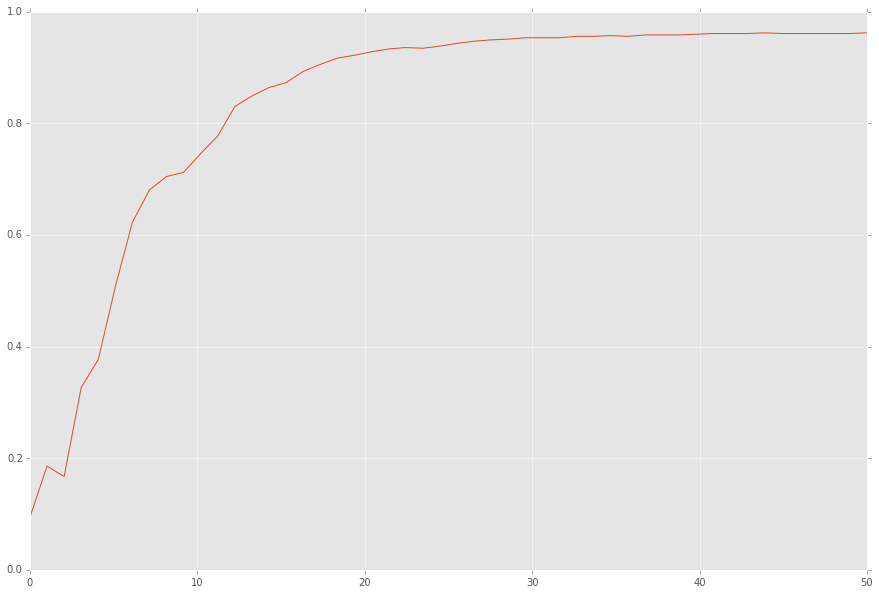

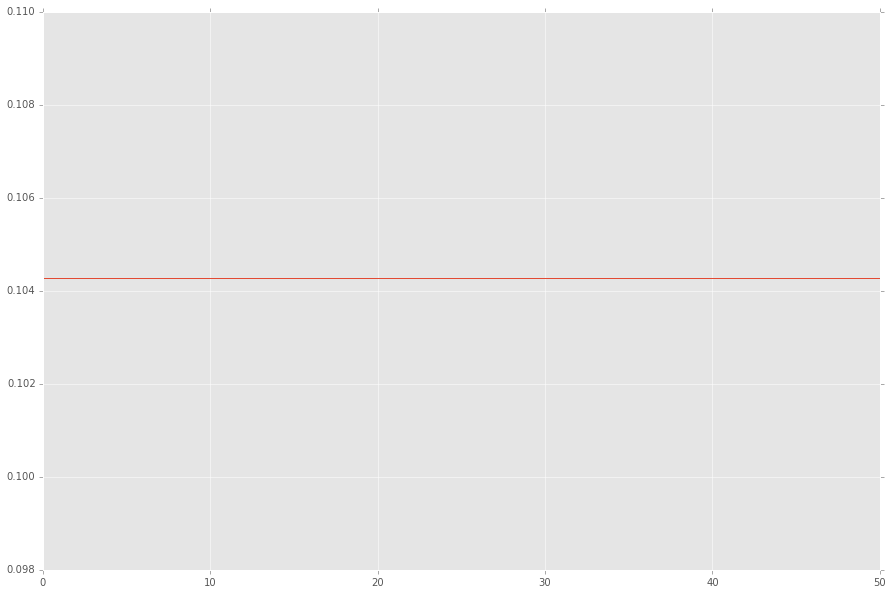

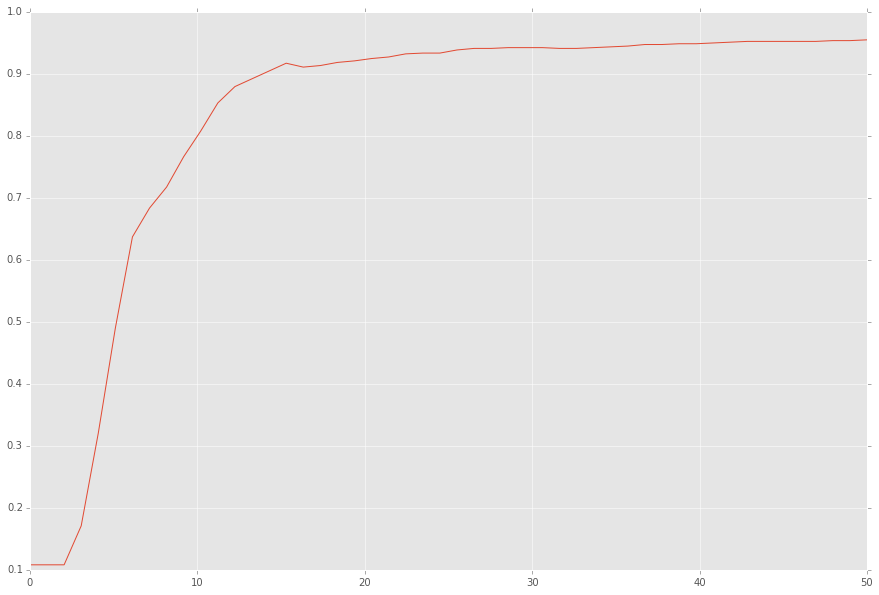

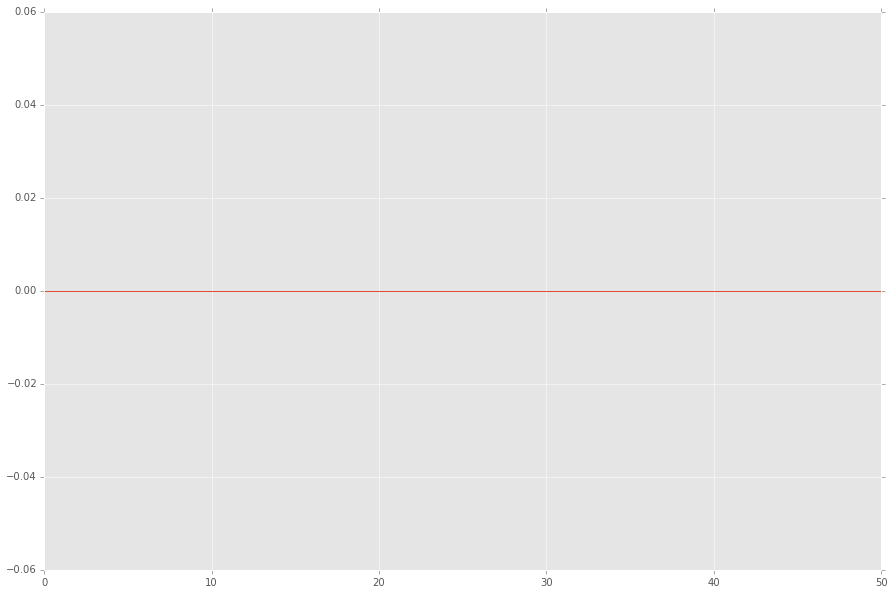

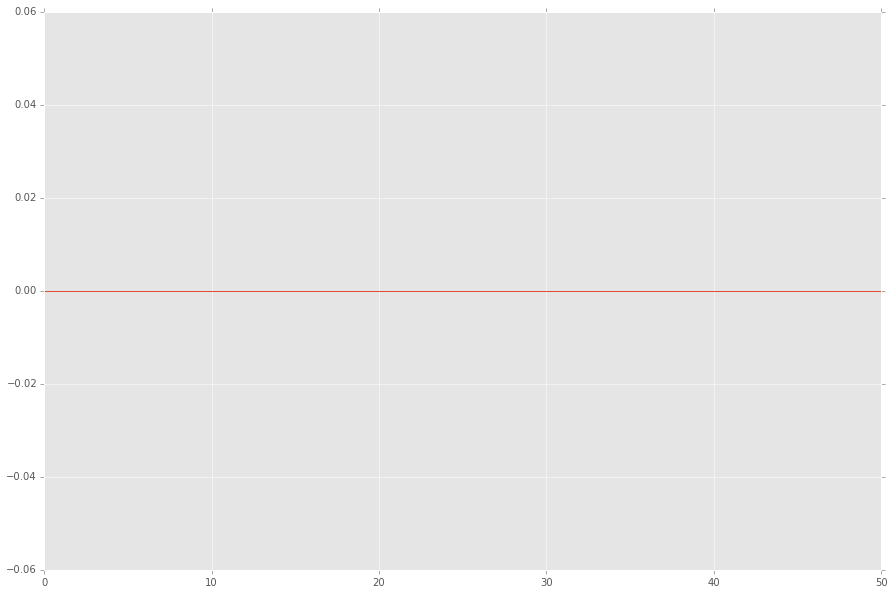

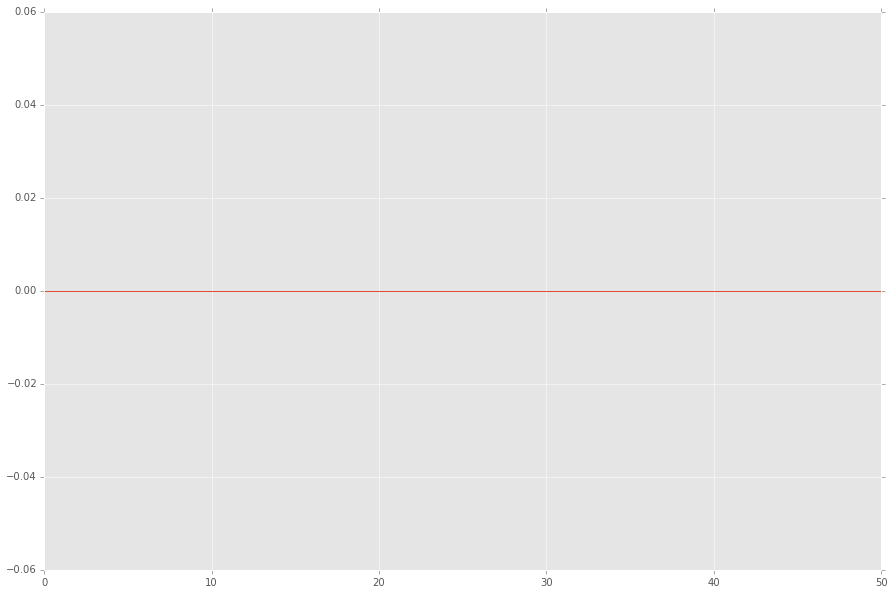

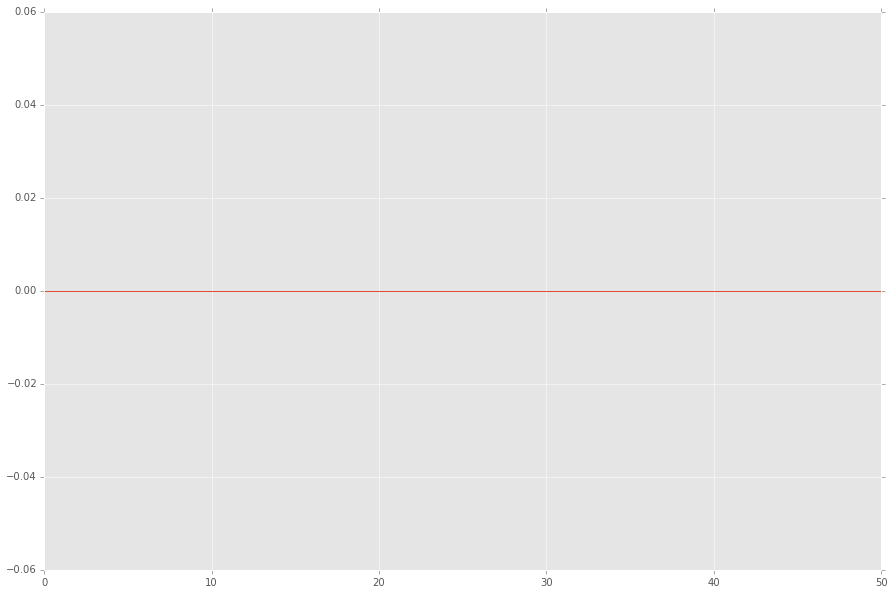

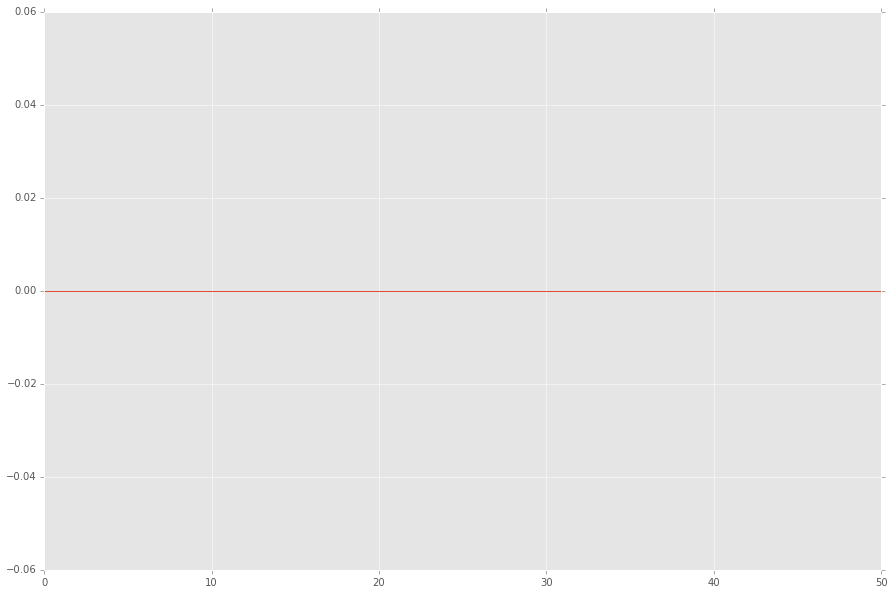

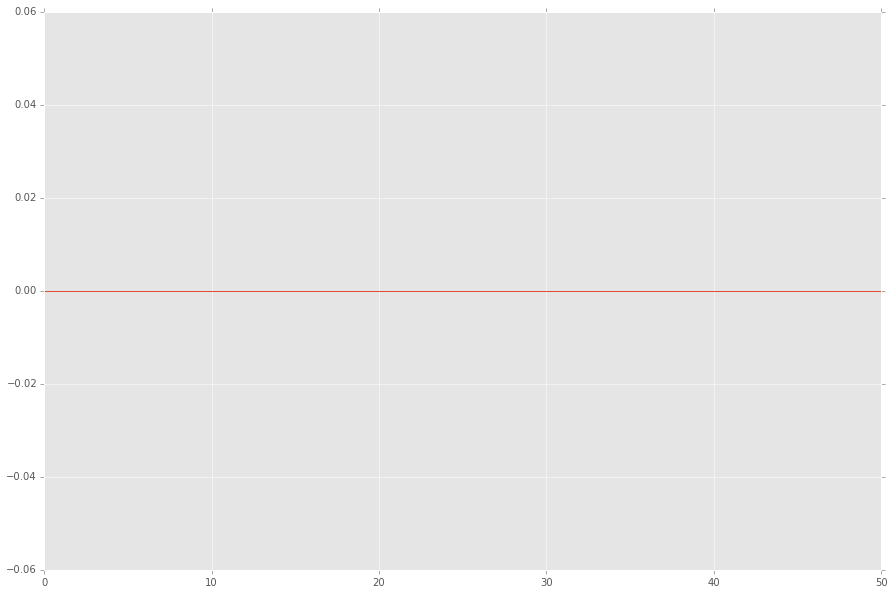

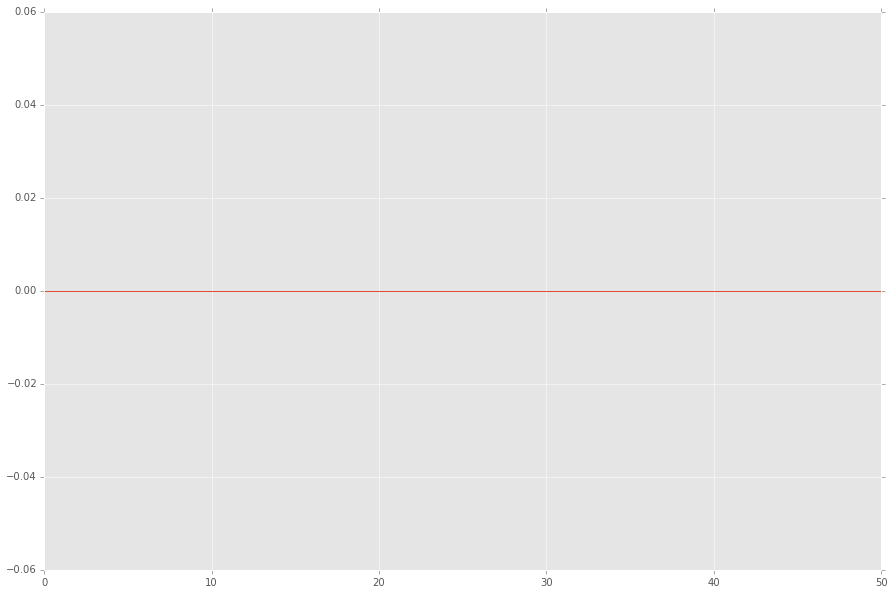

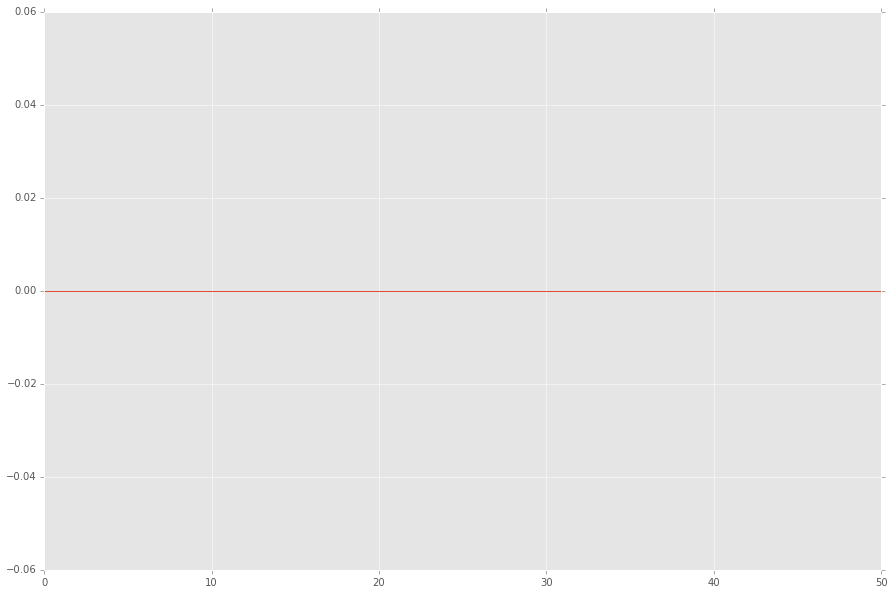

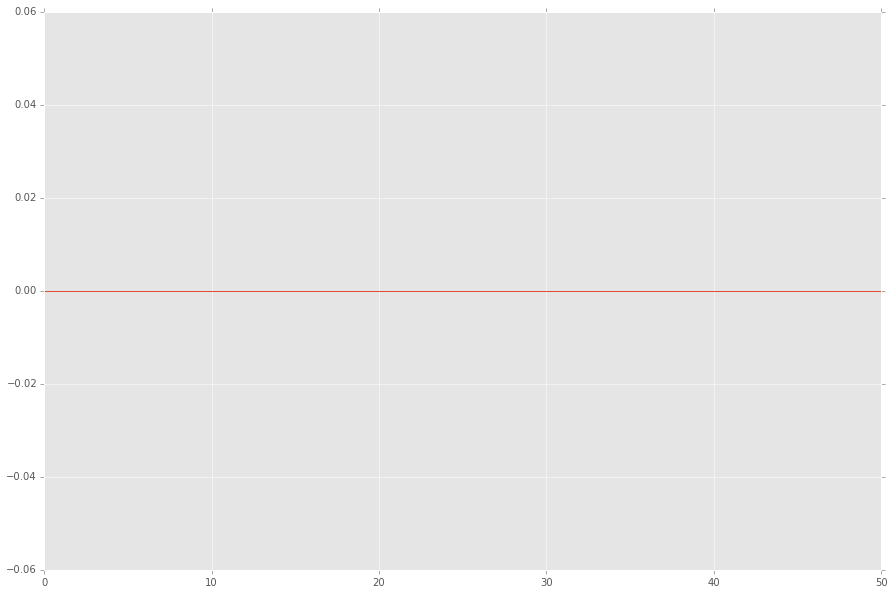

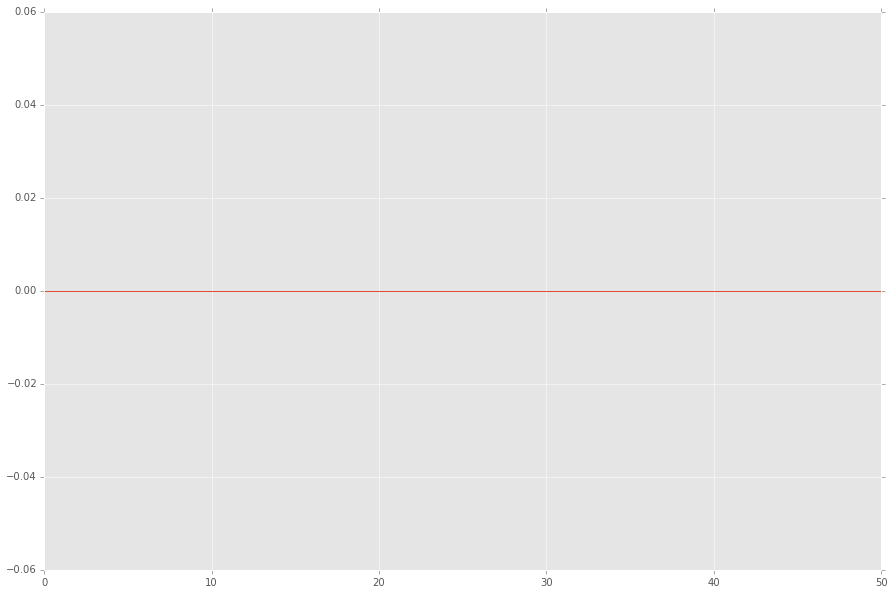

In [12]:
for i in range(20):
    plt.figure(figsize=(15,10))
    plt.plot(np.linspace(0,50,50),accu[i])

In [7]:
acc0 = np.loadtxt("Accuracy_Data_run_11.dat")

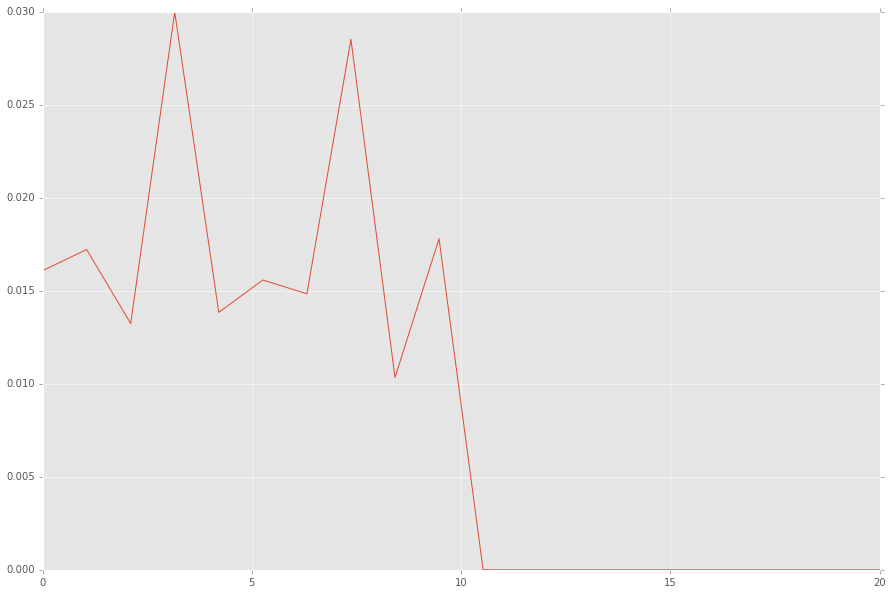

In [14]:
plt.figure(figsize=(15,10))
plt.plot(np.linspace(0,20,20), fracerr)

In [8]:
def plot_epochs(az_angle, eleva):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.linspace(0,50,50), np.linspace(0,20, 20))
    ax.plot_surface(X, Y, acc0)
    ax.view_init(elev=eleva, azim=az_angle)

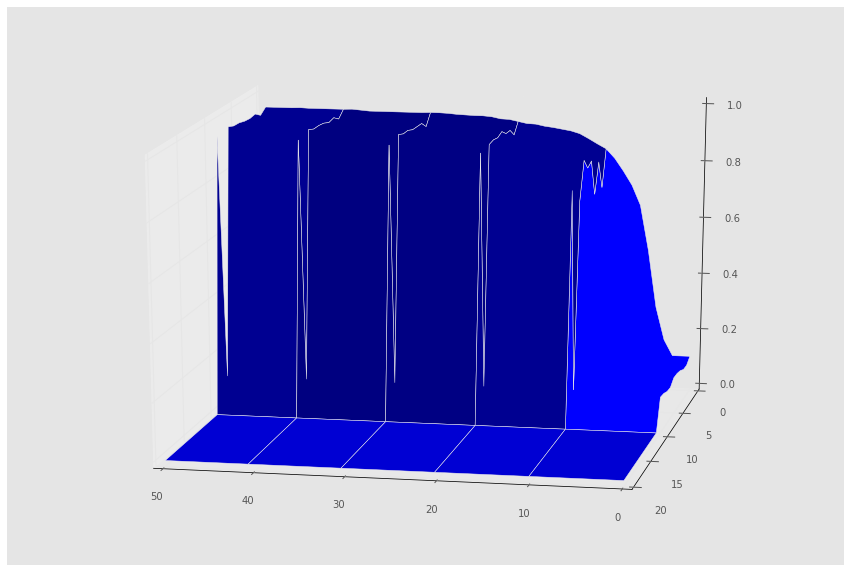

In [9]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1))